# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


# Load the datasets

In [2]:
# Load the datasets
train_data = pd.read_csv('/Users/lilianngonadi/Downloads/twitter_training.csv')
validation_data = pd.read_csv('/Users/lilianngonadi/Downloads/twitter_validation.csv')

# Display the first few rows of each dataset
train_data.head(), validation_data.head()

(   2401  Borderlands  Positive  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
   im getting on borderlands and i will murder you all ,  
 0  I am coming to the borders and I will kill you...     
 1  im getting on borderlands and i will kill you ...     
 2  im coming on borderlands and i will murder you...     
 3  im getting on borderlands 2 and i will murder ...     
 4  im getting into borderlands and i can murder y...     ,
    3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy,

# Explore the data

In [3]:
# Check the structure of the datasets
train_data.info(), validation_data.info()

# Basic statistics
train_data.describe(), validation_data.describe()

# Check for missing values
train_data.isnull().sum(), validation_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                     

(2401                                                       0
 Borderlands                                                0
 Positive                                                   0
 im getting on borderlands and i will murder you all ,    686
 dtype: int64,
 3364                                                                                                                                                                                                                                                  0
 Facebook                                                                                                                                                                                                                                              0
 Irrelevant                                                                                                                                                                                                                                    

# Data Cleaning and Preprocessing

In [4]:
# Fill missing values with empty strings
train_data.fillna("", inplace=True)
validation_data.fillna("", inplace=True)

# Combine the text columns into a single column for analysis
train_data['text'] = train_data[['Borderlands', 'im getting on borderlands and i will murder you all ,']].agg(' '.join, axis=1)
validation_data['text'] = validation_data[['Facebook', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']].agg(' '.join, axis=1)

# Select features and labels
X_train = train_data['text']
y_train = train_data['Positive']
X_val = validation_data['text']
y_val = validation_data['Irrelevant']

# Display the cleaned and combined data
train_data[['text', 'Positive']].head(), validation_data[['text', 'Irrelevant']].head()


(                                                text  Positive
 0  Borderlands I am coming to the borders and I w...  Positive
 1  Borderlands im getting on borderlands and i wi...  Positive
 2  Borderlands im coming on borderlands and i wil...  Positive
 3  Borderlands im getting on borderlands 2 and i ...  Positive
 4  Borderlands im getting into borderlands and i ...  Positive,
                                                 text Irrelevant
 0  Amazon BBC News - Amazon boss Jeff Bezos rejec...    Neutral
 1  Microsoft @Microsoft Why do I pay for WORD whe...   Negative
 2  CS-GO CSGO matchmaking is so full of closet ha...   Negative
 3  Google Now the President is slapping Americans...    Neutral
 4  FIFA Hi @EAHelp I’ve had Madeleine McCann in m...   Negative)

# Text Preprocessing and Feature Extraction

In [5]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the validation data
X_val_tfidf = tfidf.transform(X_val)

# Display the shape of the transformed data
X_train_tfidf.shape, X_val_tfidf.shape

((74681, 5000), (999, 5000))

# Random Forest Model Training

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)

# Train the Random Forest model
rf_model.fit(X_train_tfidf, y_train)

# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
report_rf = classification_report(y_val, y_val_pred_rf)
conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)

# Print cross-validation scores and evaluation metrics
print("Cross-validation F1 scores: ", cv_scores)
print("Mean F1 score: ", cv_scores.mean())
print("Standard deviation of F1 scores: ", cv_scores.std())
print("Validation Accuracy: ", accuracy_rf)
print("Classification Report: \n", report_rf)
print("Confusion Matrix: \n", conf_matrix_rf)


Cross-validation F1 scores:  [0.91389978 0.91985047 0.92004813 0.91833539 0.91853548]
Mean F1 score:  0.9181338517797422
Standard deviation of F1 scores:  0.0022244346808895092
Validation Accuracy:  0.964964964964965
Classification Report: 
               precision    recall  f1-score   support

  Irrelevant       0.99      0.94      0.96       171
    Negative       0.95      0.97      0.96       266
     Neutral       0.97      0.97      0.97       285
    Positive       0.96      0.97      0.97       277

    accuracy                           0.96       999
   macro avg       0.97      0.96      0.96       999
weighted avg       0.97      0.96      0.96       999

Confusion Matrix: 
 [[160   4   4   3]
 [  1 258   3   4]
 [  0   5 276   4]
 [  0   4   3 270]]


# Plot ROC curve

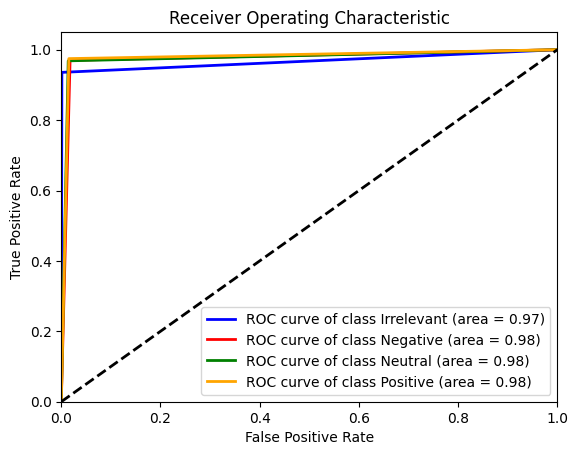

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(rf_model.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val == rf_model.classes_[i], y_val_pred_rf == rf_model.classes_[i])
    roc_auc[i] = roc_auc_score(y_val == rf_model.classes_[i], y_val_pred_rf == rf_model.classes_[i])

# Plot ROC curve
plt.figure()
for i, color in zip(range(n_classes), ['blue', 'red', 'green', 'orange']):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
                                                      ''.format(rf_model.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Plot Precision-Recall curve

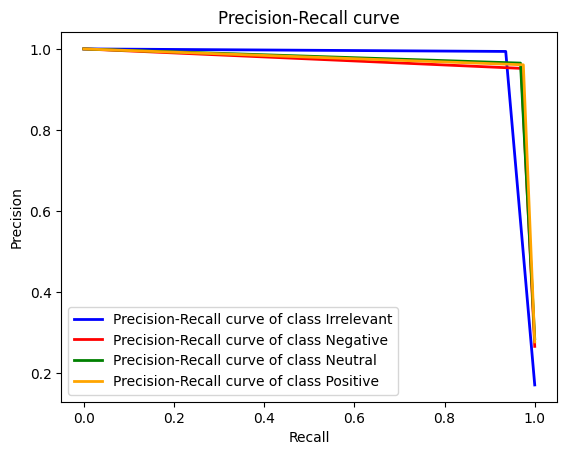

In [8]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve for each class
precision = dict()
recall = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_val == rf_model.classes_[i], y_val_pred_rf == rf_model.classes_[i])

# Plot Precision-Recall curve
plt.figure()
for i, color in zip(range(n_classes), ['blue', 'red', 'green', 'orange']):
    plt.plot(recall[i], precision[i], color=color, lw=2, label='Precision-Recall curve of class {0}'
                                                             ''.format(rf_model.classes_[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

# Learning curve

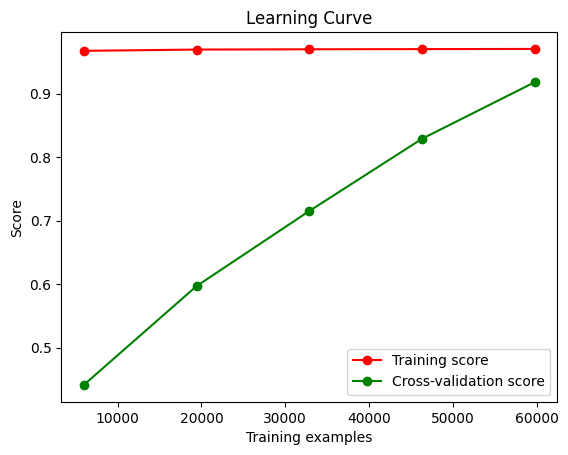

In [9]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train_tfidf, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


# Save the model

In [11]:
import joblib

# Save the model
joblib.dump(rf_model, 'rf_model.pkl')
# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']